In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [3]:
data = pd.read_csv("HR_Analytics.csv")

data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
#select columns of a certain data type
data.select_dtypes(include='object').columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [5]:
#function to get the number of columns that have an object data type
len(data.select_dtypes(include='object').columns)

9

<Axes: xlabel='Attrition', ylabel='count'>

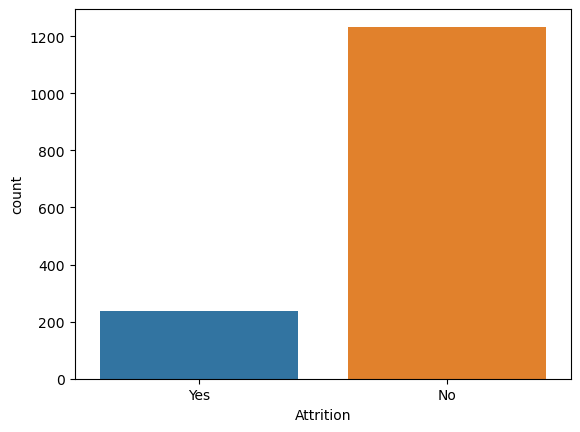

In [6]:
#plot the count of values in the Attrition column of the DataFrame
sns.countplot(x='Attrition', data=data)

<Axes: xlabel='JobSatisfaction', ylabel='count'>

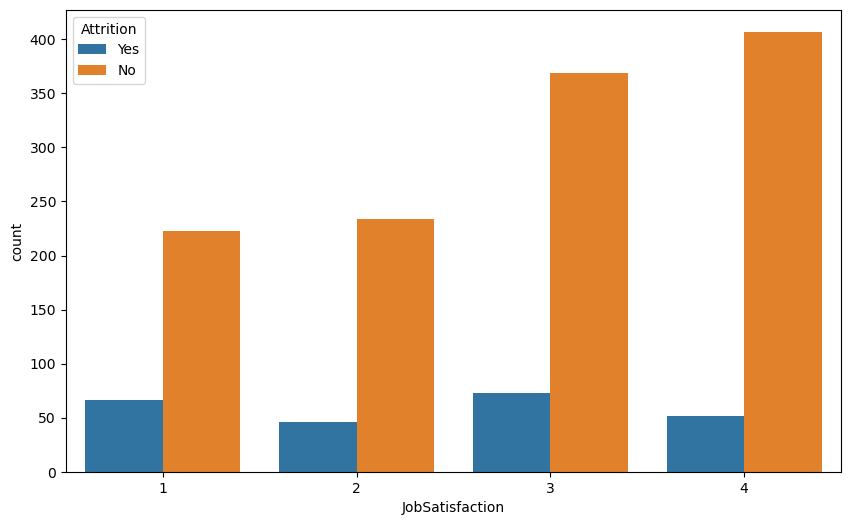

In [7]:
#plot the count of values in the JobSatisfaction column of the DataFrame data with respect to the Attrition column.
plt.figure(figsize=(10,6))
sns.countplot(x='JobSatisfaction', hue='Attrition', data=data)

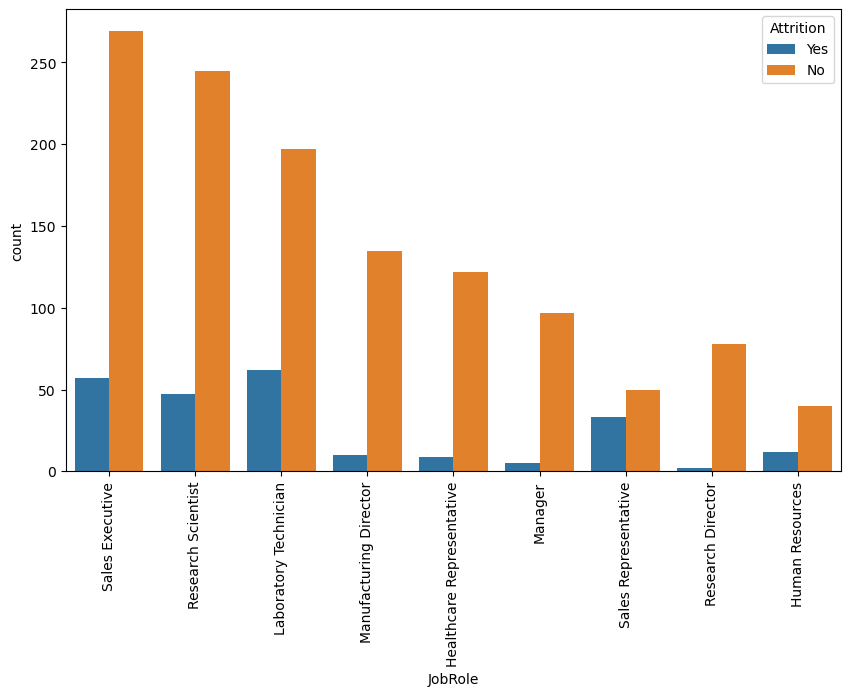

In [8]:
#plot the count of values in the “JobRole” column of the DataFrame “data” with respect to the “Attrition” column.
plt.figure(figsize=(10,6))
sns.countplot(x='JobRole', hue='Attrition', data=data,)
plt.xticks(rotation=90)
plt.show()

In [9]:
data.select_dtypes(include='object').columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [10]:
def binary_map(x):
    if x =='Yes':
        return 1
    else:
        return 0

In [11]:
data['Attrition'] = data['Attrition'].apply(binary_map)

In [12]:
data['OverTime'] = data['OverTime'].apply(binary_map)

In [13]:
data['Over18'].unique()

array(['Y'], dtype=object)

In [14]:
data['EmployeeCount'].unique()

array([1], dtype=int64)

In [15]:
data['StandardHours'].unique()

array([80], dtype=int64)

In [16]:
#remove the “Over18”, “EmployeeCount”, and “StandardHours” columns from the DataFrame 
data = data.drop('Over18', axis=1)
data = data.drop('EmployeeCount', axis=1)
data = data.drop('StandardHours', axis=1)

In [17]:
data.select_dtypes(include='object').columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus'],
      dtype='object')

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
encoder = LabelEncoder()

In [20]:
#encode the “Gender”, “BusinessTravel”, “EducationField”, “Department”, “JobRole”, and “MaritalStatus” columns of the DataFrame
data['Gender'] = encoder.fit_transform(data['Gender'])
# 0 for female and 1 for male
data['BusinessTravel'] = encoder.fit_transform(data['BusinessTravel'])
#Travel rarely =2, Travel Frequently =1, non travel =0
data['EducationField'] = encoder.fit_transform(data['EducationField'])
data['Department'] = encoder.fit_transform(data['Department'])
data['JobRole'] = encoder.fit_transform(data['JobRole'])
data['MaritalStatus'] = encoder.fit_transform(data['MaritalStatus'])

In [21]:
data.select_dtypes(include="object").columns

Index([], dtype='object')

In [22]:
x = data.drop('Attrition', axis=1).values

In [23]:
y = data['Attrition'].values

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [25]:
#split the numpy arrays “x” and “y” into random train and test subsets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 

In [26]:
scaler = StandardScaler()

In [27]:
#standardize the training data “x_train”
x_train = scaler.fit_transform(x_train)

In [28]:
#standardize the test data “x_test”
x_test = scaler.transform(x_test)

In [57]:
#get the dimensions of the numpy array “x_train”.
x_train.shape

(1176, 31)

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [36]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [37]:
model_lr = LogisticRegression()

In [38]:
model_lr.fit(x_train, y_train)

LogisticRegression()

In [39]:
y_pred_lr = model_lr.predict(x_test)

In [40]:
#The code provided is printing the accuracy score, confusion matrix,and classification report for the logistic regression model. The accuracy score is the proportion of correct predictions among the total number of predictions. The confusion matrix is a table that summarizes the performance of a classification algorithm. The classification report is a text summary of the precision, recall, F1 score for each class.
print('Logistic Regression')
print('\nAccuracy:', accuracy_score(y_test, y_pred_lr))
print('\nconfusion matrix:\n', confusion_matrix(y_test, y_pred_lr))
print('\nclassification report:\n', classification_report(y_test, y_pred_lr))

Logistic Regression

Accuracy: 0.891156462585034

confusion matrix:
 [[249   6]
 [ 26  13]]

classification report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       255
           1       0.68      0.33      0.45        39

    accuracy                           0.89       294
   macro avg       0.79      0.65      0.69       294
weighted avg       0.88      0.89      0.87       294



In [41]:
model_rf = RandomForestClassifier()

In [42]:
model_rf.fit(x_train, y_train)

RandomForestClassifier()

In [43]:
y_pred_rf = model_rf.predict(x_test)

In [44]:
print('Random Forest Classifier')
print('\nAccuracy:', accuracy_score(y_test, y_pred_rf))
print('\nconfusion matrix:\n', confusion_matrix(y_test, y_pred_rf))
print('\nclassification report:\n', classification_report(y_test, y_pred_rf))

Random Forest Classifier

Accuracy: 0.8775510204081632

confusion matrix:
 [[254   1]
 [ 35   4]]

classification report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93       255
           1       0.80      0.10      0.18        39

    accuracy                           0.88       294
   macro avg       0.84      0.55      0.56       294
weighted avg       0.87      0.88      0.83       294



In [62]:
model_xgb = XGBClassifier()

In [63]:
model_xgb.fit(x_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [64]:
y_pred_xgb = model_xgb.predict(x_test)

In [65]:
print('XGB Classifier')
print('\nAccuracy:', accuracy_score(y_test, y_pred_xgb))
print('\nconfusion matrix:\n', confusion_matrix(y_test, y_pred_xgb))
print('\nclassification report:\n', classification_report(y_test, y_pred_xgb))

XGB Classifier

Accuracy: 0.8639455782312925

confusion matrix:
 [[244  11]
 [ 29  10]]

classification report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92       255
           1       0.48      0.26      0.33        39

    accuracy                           0.86       294
   macro avg       0.68      0.61      0.63       294
weighted avg       0.84      0.86      0.85       294



In [ ]:
The accuracy of the model is 0.8639455782312925. 
The confusion matrix shows that there are 244 true negatives 
and 11 false positives for class 0 (employees who did not leave) 
and 29 false negatives and 10 true positives for class 1 (employees who left). 
The classification report shows that the precision, recall, and f1-score for class 0 are 0.89, 0.96, and 0.92 respectively 
while those for class 1 are 0.48, 0.26, and 0.33 respectively.

In [47]:
from sklearn.svm import SVC

In [48]:
model_svc = SVC()

In [49]:
model_svc.fit(x_train, y_train)

SVC()

In [50]:
y_pred_svc = model_svc.predict(x_test)

In [51]:
#The code you provided is printing the accuracy score, confusion matrix and classification report for the SVC model. The accuracy score is the percentage of correctly classified samples. The confusion matrix shows the number of true positives, false positives, true negatives and false negatives. The classification report shows the precision, recall and f1-score for each class.
print('SVC')
print('\nAccuracy:', accuracy_score(y_test, y_pred_svc))
print('\nconfusion matrix:\n', confusion_matrix(y_test, y_pred_svc))
print('\nclassification report:\n', classification_report(y_test, y_pred_svc))

SVC

Accuracy: 0.8843537414965986

confusion matrix:
 [[255   0]
 [ 34   5]]

classification report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94       255
           1       1.00      0.13      0.23        39

    accuracy                           0.88       294
   macro avg       0.94      0.56      0.58       294
weighted avg       0.90      0.88      0.84       294



In [ ]:

#CONCLUSION ON EMPLOYEE ATTRITION BASED ON SVC RESULT
The accuracy score of 0.88 means that the model is able to correctly classify 88% of the samples. 
The confusion matrix shows that there are 255 true positives (employees who stayed) and 5 false negatives (employees who left but were predicted to stay). 
The classification report shows that the precision for class 1 (employees who left) is 1.0, which means that all the employees who were predicted to leave actually left. 
The recall for class 1 is 0.13, which means that only 13% of the employees who actually left were correctly identified by the model.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
model = Sequential()

model.add(Dense(32, activation='relu')),
model.add(Dropout(0.5)),
model.add(Dense(16, activation='relu')),
model.add(Dropout(0.5)),

model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(
    monitor='val_loss',
    mode='min',
    verbose=1,
    patience=25
)

In [ ]:
model.fit(x=x_train, y=y_train, epochs=200, validation_data =(x_test, y_test), callbacks=[early_stop])

In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses.plot()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
model.evaluate(x_test, y_test)

In [ ]:
y_pred = [ 1 if y>=0.5 else 0 for y in y_pred ]

In [ ]:
print('\nAccuracy:', accuracy_score(y_test, y_pred))
print('\nconfusion matrix:\n', confusion_matrix(y_test, y_pred))
print('\nclassification report:\n', classification_report(y_test, y_pred))

In [ ]:
target=df.iloc[:,1].value_counts()
plt.pie(target,labels=["Attrited","Not Attrited"],autopct = "%0.2f",shadow = True,startangle = 140)
plt.title = ("Attrition")
plt.legend(loc = "lower left")
plt.show()
df['Attrition'].value_counts().plot.bar()

In [ ]:
target=df.iloc[:,4].value_counts()
plt.pie(target,labels=["Research & Development","Sales","Human Resources"],autopct = "%0.2f",shadow = True,startangle = 140)
plt.title = ("Department")
plt.legend(loc = "lower left")
plt.show()
#df['Department'].value_counts().plot.bar()
sns.countplot(x='Department', hue='Attrition', data=df);

In [ ]:
target=df.iloc[:,11].value_counts()
plt.pie(target,labels=["male","female"],autopct = "%0.2f",shadow = True,startangle = 140)
plt.title = ("GENDER")
plt.legend(loc = "lower left")
plt.show()
#df['Gender'].value_counts().plot.bar()
sns.countplot(x='Attrition', hue='Gender', data=df);


In [ ]:
target=df.iloc[:,17].value_counts()
plt.pie(target,labels=["single","married","divorsed"],autopct = "%0.2f",shadow = True,startangle = 140)
plt.title = ("MaritalStatus")
plt.legend(loc = "lower left")
plt.show()
sns.countplot(x='Attrition', hue= 'MaritalStatus', data = df)
plt.show()

In [ ]:
sns.countplot(x='PerformanceRating', hue= 'Attrition', data = df)
plt.show()


In [ ]:
plt.figure(figsize=(50,40))
sns.countplot(x='Age', hue='Attrition', data=df);


In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='EnvironmentSatisfaction', hue='Attrition', data=df);


In [ ]:
target=df.iloc[:,22].value_counts()
plt.pie(target,labels=["yes","no"],autopct = "%0.2f",shadow = True,startangle = 140)
plt.title = ("MaritalStatus")
plt.legend(loc = "lower left")
plt.show()
sns.countplot(x='OverTime', hue='Attrition', data=df);


In [ ]:
plt.figure(figsize = (30,20))        # Size of the figure
sns.heatmap(df.corr(),annot = True)
plt.show()

In [ ]:
# Plotting the numerical variables in histograms to see their distribution.
df.hist(figsize=(20,20))
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [ ]:
df.isnull().sum()

In [ ]:
df.describe()

In [ ]:
df.describe(include=object).T

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
varlist =  ['Attrition','OverTime']

In [ ]:
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})
df[varlist] = df[varlist].apply(binary_map)

In [ ]:
pd.pandas.set_option("display.max_columns",None)
df.head()

In [ ]:
label=LabelEncoder()
BusinessTravel=label.fit_transform(df['BusinessTravel'])
Department=label.fit_transform(df['Department'])
EducationField=label.fit_transform(df['EducationField'])
Gender=label.fit_transform(df['Gender'])
JobRole=label.fit_transform(df['JobRole'])
MaritalStatus=label.fit_transform(df['MaritalStatus'])
Over18=label.fit_transform(df['Over18'])
df['BusinessTravel']=BusinessTravel
df['Department']=Department
df['EducationField']=EducationField
df['Gender']=Gender
df['JobRole']=JobRole
df['MaritalStatus']=MaritalStatus
df['Over18']=Over18


In [ ]:
pd.pandas.set_option("display.max_columns",None)
df.head()

In [ ]:
X=df.drop(["Attrition"],axis=1)
X.head()

In [ ]:
y=df['Attrition']
y.head()

In [ ]:
sc=StandardScaler()
x=sc.fit_transform(X)

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=100)

In [ ]:
xtrain

In [ ]:
model1=LogisticRegression()
model1.fit(xtrain,ytrain)

In [ ]:
ypred1=model1.predict(xtest)

In [ ]:
ypred1

In [ ]:
cm1=confusion_matrix(ytest,ypred1)

In [ ]:
cm1

In [ ]:
ac1=accuracy_score(ytest,ypred1)

In [ ]:
ac1

In [ ]:
cr1=classification_report(ytest,ypred1)


In [ ]:
cr1

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier(criterion="gini")
model2.fit(xtrain,ytrain)
ypred2=model2.predict(xtest)
cm2=confusion_matrix(ytest,ypred2)

In [ ]:
cm2

In [ ]:
ac2=accuracy_score(ytest,ypred2)
ac2

In [ ]:
classification_report(ytest,ypred2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model3=RandomForestClassifier(n_estimators=5,criterion='entropy')
model3.fit(xtrain,ytrain)
ypred3=model3.predict(xtest)
cm3=confusion_matrix(ytest,ypred3)
cm3

In [ ]:
ac3=accuracy_score(ytest,ypred3)
ac3

In [ ]:
classification_report(ytest,ypred3)

In [ ]:
from sklearn.svm import SVC
model4=SVC(kernel="linear",random_state=0)
model4.fit(xtrain,ytrain)
ypred4=model4.predict(xtest)
cm4=confusion_matrix(ytest,ypred4)
cm4

In [ ]:
ac4=accuracy_score(ytest,ypred4)
ac4

In [ ]:
classification_report(ytest,ypred4)

In [ ]:
model5=SVC(kernel='rbf',random_state=0)
model5.fit(xtrain,ytrain)
ypred5=model5.predict(xtest)
confusion_matrix(ytest,ypred5)


In [ ]:
accuracy_score(ytest,ypred5)

In [ ]:
classification_report(ytest,ypred5)

In [ ]:
#create list of categorical columns
categorical_columns = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

#check for unique value in categorical columns
for column in categorical_columns:
    unique_values = emp_data_df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

In [ ]:
#create a copy of a dataframe for encoded data
encoded_emp_data_df = emp_data_df.copy()

#create dictionary to store the label encoders
label_encoders = {}

#fit and perform label encoding for each categorical column
for column in categorical_columns:
    label_encoder = LabelEncoder()
    encoded_emp_data_df[column] = label_encoder.fit_transform(encoded_emp_data_df[column])
    label_encoders[column] = label_encoder
    #check encoded data head
encoded_emp_data_df.head()

In [ ]:
#check the mapping of original labels and encoded values
for col, map_dict in label_encoders.items():
    print(f"Column '{col}':")
    for label, encoded_value in zip(map_dict.classes_, map_dict.transform(map_dict.classes_)):
        print(f'{label}: {encoded_value}')

In [ ]:
#calculate attrition count
attrition_counts = emp_data_df['Attrition'].value_counts()

#create figure with pie chart
fig = px.pie(names=attrition_counts.index, values=attrition_counts)

#update layout
fig.update_layout(
    title='Employee Attrition Size',
    template='seaborn'
)

#show figure
fig.show()

In [ ]:
#create correlation matrix
correlation_matrix = encoded_emp_data_df.corr()

#create figure with heatmap
fig = px.imshow(
    correlation_matrix.values, 
    x=correlation_matrix.columns, y=correlation_matrix.columns,
    zmin=-0.8, zmax=0.8, 
    color_continuous_scale='RdBu', 
    aspect='auto'
)

In [ ]:
#update layout
fig.update_layout(
    title='Correlation Heatmap',
    height=800,
    template='seaborn'
)

#show figure
fig.show()

In [ ]:
#define dictionary for mapping label
education_mapping = {1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'}

#replace values in specified columns
emp_data_df['Education'] = emp_data_df['Education'].replace(education_mapping)

#check data head
emp_data_df.head()

In [ ]:
#group attrition by age
attrition_age = pd.pivot_table(emp_data_df, index='Age', columns='Attrition', aggfunc='size')

#check data
attrition_age.head()

In [ ]:
#find attrition in environment satisfaction, job involvementm and job level
attrition_environment = pd.pivot_table(emp_data_df, index='EnvironmentSatisfaction', columns='Attrition', aggfunc='size')
attrition_involvement = pd.pivot_table(emp_data_df, index='JobInvolvement', columns='Attrition', aggfunc='size')
attrition_joblevel = pd.pivot_table(emp_data_df, index='JobLevel', columns='Attrition', aggfunc='size')
attrition_jobsatisfaction = pd.pivot_table(emp_data_df, index='JobSatisfaction', columns='Attrition', aggfunc='size')

In [ ]:
#find attrition by marital status
attrition_marital = pd.pivot_table(emp_data_df, index='MaritalStatus', columns='Attrition', aggfunc='size')

#calculate the precentage of attrition
attrition_marital['Yes_percent'] = attrition_marital['Yes'] / (attrition_marital['Yes'] + attrition_marital['No']) * 100
attrition_marital['No_percent'] = attrition_marital['No'] / (attrition_marital['Yes'] + attrition_marital['No']) * 100

#check data
attrition_marital

In [ ]:
#find attrition by monthly income
attrition_monthincome = emp_data_df[['Attrition', 'MonthlyIncome']]

#check data
attrition_monthincome.head()

In [ ]:
#create a cross-tab of attrition and overtime
attrition_overtime = pd.crosstab(emp_data_df['Attrition'], emp_data_df['OverTime'])

#check data
attrition_overtime

In [ ]:
#find count of attrition by stock option level
attrition_stockoption = pd.pivot_table(emp_data_df, index='Attrition', columns='StockOptionLevel', aggfunc='size')

#find count of stock option level
occurrence_stockoption = emp_data_df['StockOptionLevel'].value_counts()

#check data
attrition_stockoption

In [ ]:
#find total working years
attrition_totalworkyear = emp_data_df[['Attrition', 'TotalWorkingYears']]
attrition_yearsatcompany = emp_data_df[['Attrition', 'YearsAtCompany']]
attrition_yearscurrrole = emp_data_df[['Attrition', 'YearsInCurrentRole']]
attrition_yearscurrmgr = emp_data_df[['Attrition', 'YearsWithCurrManager']]

#create list of dataframe
attrition_yeardata = [attrition_totalworkyear, attrition_yearsatcompany, attrition_yearscurrrole, attrition_yearscurrmgr]

#check each of the data
for i, data in enumerate(attrition_yeardata):
    display(data.head(3))
    print('-' * 80)

In [ ]:
#filter data to only include the listed features previously
columns = [
    'Age', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 
    'MaritalStatus', 'MonthlyIncome', 'OverTime', 'StockOptionLevel', 'TotalWorkingYears', 
    'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager', 'Attrition'
]

#create a copy of dataframe with selected columns
ml_data_df = pd.DataFrame(encoded_emp_data_df[columns])
ml_data_df.head()

In [ ]:
#select X, y data as target data
X = ml_data_df.drop('Attrition', axis=1)
y = ml_data_df['Attrition']

#check data shape
print(X.shape, y.shape)

In [ ]:
#Scale X data
minmax_scaler = MinMaxScaler()
X_scaled = minmax_scaler.fit_transform(X)

#create instance of ExtraTreesClassifier
extra_trees = ExtraTreesClassifier()
extra_trees.fit(X_scaled, y)

#feature importance
feat_importance = extra_trees.feature_importances_
feat_importance

In [ ]:
#sort feature in ascending
sorted_indices = np.argsort(feat_importance)
sorted_feat_importance = feat_importance[sorted_indices]
sorted_columns = X.columns[sorted_indices]

#create figure
fig = go.Figure()

#create bar trace
trace = go.Bar(
    x=sorted_feat_importance,
    y=sorted_columns,
    orientation='h'
)

In [ ]:
#add trace to figure
fig.add_trace(trace)

#update layout
fig.update_layout(
    title='Feature Importance',
    xaxis=dict(title='Importance'),
    yaxis=dict(title='Feature'),
    height=600,
    margin=dict(l=150)
)

#show figure
fig.show()

In [ ]:
#split data into train and test set using scaled data.
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print('training shape: ', X_train_scaled.shape, y_train.shape)
print('testing shape: ', X_test_scaled.shape, y_test.shape)

In [ ]:
#create instance for each classifier
lr_classifier = LogisticRegression()
svc_classifier = SVC()
kn_classifier = KNeighborsClassifier()
dt_classifier = DecisionTreeClassifier()
rf_classifier = RandomForestClassifier()

#define list of classifier
classifier_list = [lr_classifier, svc_classifier, kn_classifier, dt_classifier, rf_classifier]

#check the accuracy score on scalled features 
for classifier in classifier_list:
    #fit data into classifier
    classifier.fit(X_train_scaled, y_train)
    

In [ ]:
#predict test data
    pred = classifier.predict(X_test_scaled)
    
    #check the resulting accuracy
    print(classifier.__class__.__name__, ' ', accuracy_score(y_test,pred))
    

In [ ]:
#define the list of classifiers and their names for the VotingClassifier
classifiers = [
    ('lgclf', lr_classifier),
    ('svc', svc_classifier),
    ('knn', kn_classifier),
    ('dt', dt_classifier),
    ('rf', rf_classifier)
]

#create instance of VotingClassifier
voting_classifier = VotingClassifier(classifiers, voting='hard')

In [ ]:
#fit on training data
voting_classifier.fit(X_train_scaled, y_train)

#predict on test data
y_pred = voting_classifier.predict(X_test_scaled)

#calculate and print the accuracy
print('Accuracy: ', accuracy_score(y_test, y_pred))

In [ ]:
#save model to a file
with open('voting_classifier.pkl', 'wb') as file:
    pickle.dump(voting_classifier, file)
    print(f'{file} exported')

In [ ]:
#get new data only for a non-attrition employee
new_test_df = ml_data_df[ml_data_df['Attrition'] == 0].copy()
new_test_df = new_test_df.drop('Attrition', axis=1)

#apply scaling to the new test data
new_test_scaled = minmax_scaler.transform(new_test_df)

#check new test df
new_test_df.shape

In [ ]:
#load saved model
with open('voting_classifier.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

#make prediction on new data
predictions = loaded_model.predict(new_test_scaled)

#print prediction
print(predictions.shape)

In [ ]:
#get employee that is yet to attrition
employee_retain = emp_data_df[emp_data_df['Attrition'] == 'No'].copy()
employee_retain['Predictions'] = predictions

#check employee predicted as attrition = yes/1
yes_attrition = employee_retain[employee_retain['Predictions'] == 1]
yes_attrition

In [ ]:
#select necessary feature for decision making
column_metric = ['Age', 'PerformanceRating', 'JobInvolvement', 'Education', 'StandardHours', 'YearsAtCompany', 'MonthlyIncome', 'Predictions']
employee_rating = yes_attrition[column_metric]
employee_rating